In [1]:
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np                       
import matplotlib as mpl
import matplotlib.pyplot as plt            
import matplotlib.colors as colors
from datetime import datetime
from matplotlib import gridspec,rc
from scipy.stats import spearmanr, pearsonr
from matplotlib.patches import Patch

In [2]:
#df = pd.read_csv('/pampa/cloutier/storm_tracks/NAEC/NAEC_1979-2020_max_season.csv', index_col=0)
df = pd.read_csv('/pampa/cloutier/storm_tracks/filtered/etc24_consec_season.csv', index_col=0)

In [3]:
# Only keep cyclone centers within CRCM6 subdomain
df_true = df.loc[df.HU == True].copy()
df_true = df_true.groupby(['storm', 'season'])['VORS_av08'].mean().reset_index()

# get mean value and sigma 
mean_vors = df_true['VORS_av08'].mean()
std_vors = df_true['VORS_av08'].std()

df_true['norm_VORS_av08'] = (df_true['VORS_av08'] - mean_vors) / std_vors

# separate seasons 
df_JJA = df_true.loc[df_true.season == 'JJA']
df_SON = df_true.loc[df_true.season == 'SON']
df_DJF = df_true.loc[df_true.season == 'DJF']
df_MAM = df_true.loc[df_true.season == 'MAM']

nvors_jja = df_JJA['norm_VORS_av08'].to_numpy()
nvors_son = df_SON['norm_VORS_av08'].to_numpy()
nvors_djf = df_DJF['norm_VORS_av08'].to_numpy()
nvors_mam = df_MAM['norm_VORS_av08'].to_numpy()

In [4]:
Bnwdsp_jja=np.zeros(13)
Bnwdsp_son=np.zeros(13)
Bnwdsp_djf=np.zeros(13)
Bnwdsp_mam=np.zeros(13)

for i in range(0, nvors_jja.size):
    if  nvors_jja[i]< -2.:
        Bnwdsp_jja[0]+=1
    elif  nvors_jja[i]>= -2. and nvors_jja[i]< -1.5:
        Bnwdsp_jja[1]+=1
    elif  nvors_jja[i]>= -1.5 and nvors_jja[i]< -1.:
        Bnwdsp_jja[2]+=1
    elif  nvors_jja[i]>= -1. and nvors_jja[i]< -0.5:
        Bnwdsp_jja[3]+=1
    elif  nvors_jja[i]>= -0.5 and nvors_jja[i]< 0.:
        Bnwdsp_jja[4]+=1
    elif  nvors_jja[i]>= 0. and nvors_jja[i]< 0.5:
        Bnwdsp_jja[5]+=1
    elif  nvors_jja[i]>= 0.5 and nvors_jja[i]< 1.:
        Bnwdsp_jja[6]+=1
    elif  nvors_jja[i]>= 1. and nvors_jja[i]< 1.5:
        Bnwdsp_jja[7]+=1
    elif  nvors_jja[i]>= 1.5 and nvors_jja[i]< 2.:
        Bnwdsp_jja[8]+=1
    elif  nvors_jja[i]>= 2. and nvors_jja[i]< 2.5:
        Bnwdsp_jja[9]+=1
    elif  nvors_jja[i]>= 2.5 and nvors_jja[i]< 3.:
        Bnwdsp_jja[10]+=1
    elif  nvors_jja[i]>= 3. and nvors_jja[i]< 3.5:
        Bnwdsp_jja[11]+=1
    elif  nvors_jja[i]>= 3.5:
        Bnwdsp_jja[12]+=1


for i in range(0, nvors_son.size):
    if  nvors_son[i]< -2.:
        Bnwdsp_son[0]+=1
    elif  nvors_son[i]>= -2. and nvors_son[i]< -1.5:
        Bnwdsp_son[1]+=1
    elif  nvors_son[i]>= -1.5 and nvors_son[i]< -1.:
        Bnwdsp_son[2]+=1
    elif  nvors_son[i]>= -1. and nvors_son[i]< -0.5:
        Bnwdsp_son[3]+=1
    elif  nvors_son[i]>= -0.5 and nvors_son[i]< 0.:
        Bnwdsp_son[4]+=1
    elif  nvors_son[i]>= 0. and nvors_son[i]< 0.5:
        Bnwdsp_son[5]+=1
    elif  nvors_son[i]>= 0.5 and nvors_son[i]< 1.:
        Bnwdsp_son[6]+=1
    elif  nvors_son[i]>= 1. and nvors_son[i]< 1.5:
        Bnwdsp_son[7]+=1
    elif  nvors_son[i]>= 1.5 and nvors_son[i]< 2.:
        Bnwdsp_son[8]+=1
    elif  nvors_son[i]>= 2. and nvors_son[i]< 2.5:
        Bnwdsp_son[9]+=1
    elif  nvors_son[i]>= 2.5 and nvors_son[i]< 3.:
        Bnwdsp_son[10]+=1
    elif  nvors_son[i]>= 3. and nvors_son[i]< 3.5:
        Bnwdsp_son[11]+=1
    elif  nvors_son[i]>= 3.5:
        Bnwdsp_son[12]+=1



for i in range(0, nvors_djf.size):
    if  nvors_djf[i]< -2.:
        Bnwdsp_djf[0]+=1
    elif  nvors_djf[i]>= -2. and nvors_djf[i]< -1.5:
        Bnwdsp_djf[1]+=1
    elif  nvors_djf[i]>= -1.5 and nvors_djf[i]< -1.:
        Bnwdsp_djf[2]+=1
    elif  nvors_djf[i]>= -1. and nvors_djf[i]< -0.5:
        Bnwdsp_djf[3]+=1
    elif  nvors_djf[i]>= -0.5 and nvors_djf[i]< 0.:
        Bnwdsp_djf[4]+=1
    elif  nvors_djf[i]>= 0. and nvors_djf[i]< 0.5:
        Bnwdsp_djf[5]+=1
    elif  nvors_djf[i]>= 0.5 and nvors_djf[i]< 1.:
        Bnwdsp_djf[6]+=1
    elif  nvors_djf[i]>= 1. and nvors_djf[i]< 1.5:
        Bnwdsp_djf[7]+=1
    elif  nvors_djf[i]>= 1.5 and nvors_djf[i]< 2.:
        Bnwdsp_djf[8]+=1
    elif  nvors_djf[i]>= 2. and nvors_djf[i]< 2.5:
        Bnwdsp_djf[9]+=1
    elif  nvors_djf[i]>= 2.5 and nvors_djf[i]< 3.:
        Bnwdsp_djf[10]+=1
    elif  nvors_djf[i]>= 3. and nvors_djf[i]< 3.5:
        Bnwdsp_djf[11]+=1
    elif  nvors_djf[i]>= 3.5:
        Bnwdsp_djf[12]+=1


for i in range(0, nvors_mam.size):
    if  nvors_mam[i]< -2.:
        Bnwdsp_mam[0]+=1
    elif  nvors_mam[i]>= -2. and nvors_mam[i]< -1.5:
        Bnwdsp_mam[1]+=1
    elif  nvors_mam[i]>= -1.5 and nvors_mam[i]< -1.:
        Bnwdsp_mam[2]+=1
    elif  nvors_mam[i]>= -1. and nvors_mam[i]< -0.5:
        Bnwdsp_mam[3]+=1
    elif  nvors_mam[i]>= -0.5 and nvors_mam[i]< 0.:
        Bnwdsp_mam[4]+=1
    elif  nvors_mam[i]>= 0. and nvors_mam[i]< 0.5:
        Bnwdsp_mam[5]+=1
    elif  nvors_mam[i]>= 0.5 and nvors_mam[i]< 1.:
        Bnwdsp_mam[6]+=1
    elif  nvors_mam[i]>= 1. and nvors_mam[i]< 1.5:
        Bnwdsp_mam[7]+=1
    elif  nvors_mam[i]>= 1.5 and nvors_mam[i]< 2.:
        Bnwdsp_mam[8]+=1
    elif  nvors_mam[i]>= 2. and nvors_mam[i]< 2.5:
        Bnwdsp_mam[9]+=1
    elif  nvors_mam[i]>= 2.5 and nvors_mam[i]< 3.:
        Bnwdsp_mam[10]+=1
    elif  nvors_mam[i]>= 3. and nvors_mam[i]< 3.5:
        Bnwdsp_mam[11]+=1
    elif  nvors_mam[i]>= 3.5:
        Bnwdsp_mam[12]+=1


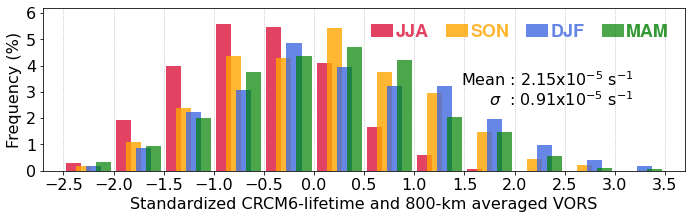

In [12]:
seasons = ['JJA', 'SON', 'DJF', 'MAM']
colors = ['crimson', 'orange', 'royalblue', 'g']

fs = 16
meanvors = mean_vors
sigmvors = std_vors

fig = plt.figure(figsize=(11.5,3))
gs = gridspec.GridSpec(1,1)

ax=plt.subplot(gs[0])

#xc=np.arange(-2., 3.5, 0.5)
xc=np.arange(-2., 4.5, 0.5)

length = len(df_true)

width=0.15

cs2 = plt.bar(xc[:]-0.4,Bnwdsp_jja[:]*100./length,width,color='crimson',alpha=0.8, label = 'JJA')
cs2 = plt.bar(xc[:]-0.3,Bnwdsp_son[:]*100./length,width,color='orange',alpha=0.8, label='SON')
cs2 = plt.bar(xc[:]-0.2,Bnwdsp_djf[:]*100./length,width,color='royalblue',alpha=0.8, label='DJF')
cs2 = plt.bar(xc[:]-0.1,Bnwdsp_mam[:]*100./length,width,color='green',alpha=0.7, label='MAM')


legend = plt.legend(frameon=False, ncol=len(seasons), columnspacing=0.5, handlelength=1,
                    prop = {'family' : 'Nimbus Sans', 'size' : 18, 'weight' : 'bold'})

for i, color in zip(range(0,len(seasons)), colors):
    #legend.get_texts()[i].set_position((-2, 0.5))
    text = legend.get_texts()[i]  # Get the first legend text
    text.set_color(color) # text color
    text.set_alpha(0.8) # text transparency
    handle = legend.legendHandles[i]
    handle.set_width(22) # rectangle width
    handle.set_x(8) # Move the rectangle closer horizontally
    
plt.xlim(-2.7,3.7)
plt.ylim(0,6.2)
ax.set_xticks([-2.5, -2,-1.5,-1,-0.5,0,0.5,1,1.5,2,2.5,3,3.5])
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
ax.set_ylabel('Frequency (%)',fontsize=fs)
ax.set_xlabel('Standardized CRCM6-lifetime and 800-km averaged VORS',fontsize=fs)
plt.grid(True,axis='x',linestyle=':')

ax.text(0.92,0.52,'Mean : '+'{:,.2f}'.format(meanvors*1.e5)+'x$10^{-5}\ \mathrm{s}^{-1}$',
        color='k',transform=ax.transAxes,ha='right',fontsize=fs)
ax.text(0.92,0.40,'$\sigma$  : '+'{:,.2f}'.format(sigmvors*1.e5)+'x$10^{-5}\ \mathrm{s}^{-1}$',
        color='k',transform=ax.transAxes,ha='right',fontsize=fs)

plt.subplots_adjust(wspace=0.2, hspace=0.2)
#plt.savefig('/pampa/cloutier/fig/freq_dist_std_vors800.png', dpi=300, bbox_inches='tight')
plt.show()